In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = [18, 12]
rcParams['font.size'] = 22
rcParams['xtick.major.size'] =  8
rcParams['xtick.minor.size'] =  4
rcParams['xtick.major.width'] =  2
rcParams['xtick.minor.width'] =  2
rcParams['ytick.major.size'] =  8
rcParams['ytick.minor.size'] =  4
rcParams['ytick.major.width'] =  2
rcParams['ytick.minor.width'] =  2

In [3]:
data_file = "mat_mul_output.txt"

In [4]:
with open(data_file, 'r') as in_file:
    lines = in_file.readlines()
    lines = lines[10:]
    N, copy, comp = [], [], []
    for line in lines:
        if 'N' in line:
            N.append(line.strip().split()[-1])
        if 'GPU_copy' in line:
            copy.append(line.strip().split()[-2])
        if 'GPU:' in line:
            comp.append(line.strip().split()[-2])
    
    N = np.array(N).astype(int)
    copy = np.array(copy).astype(float)
    comp = np.array(comp).astype(float)

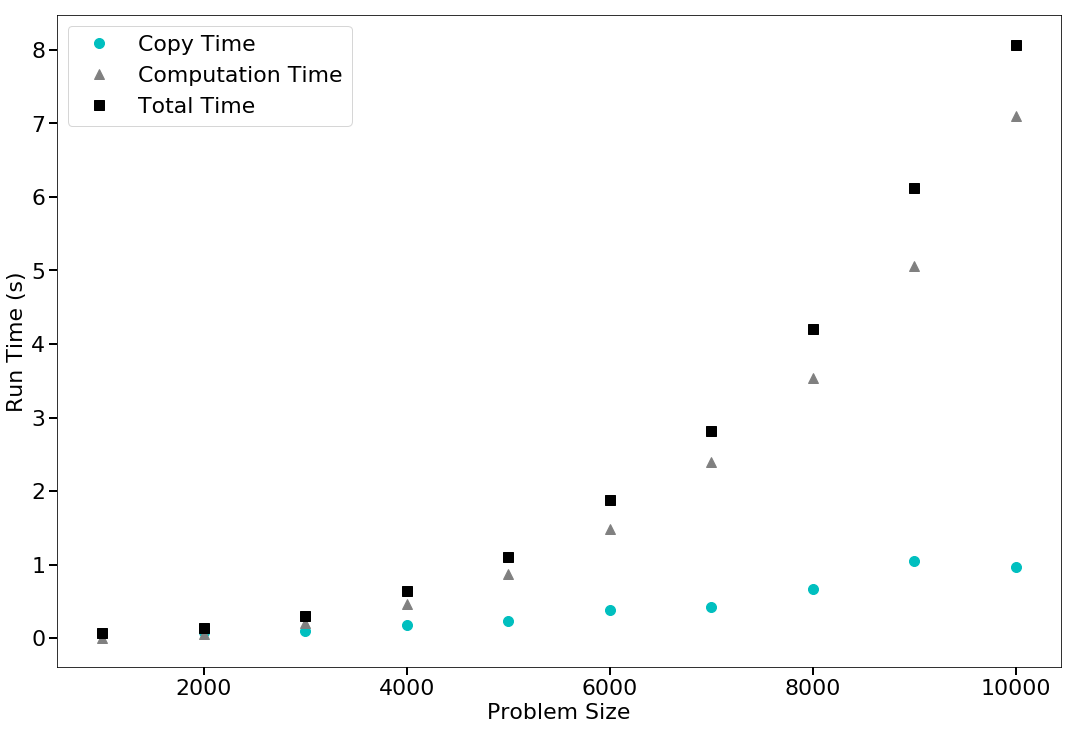

In [5]:
plt.plot(N, copy, linestyle='none', marker='o', markersize=10, color='c', label='Copy Time')
plt.plot(N, comp, linestyle='none', marker='^', markersize=10, color='grey', label='Computation Time')
plt.plot(N, copy + comp, linestyle='none', marker='s', markersize=10, color='k', label='Total Time')

plt.xlabel("Problem Size")
plt.ylabel("Run Time (s)")
plt.legend()

plt.show()

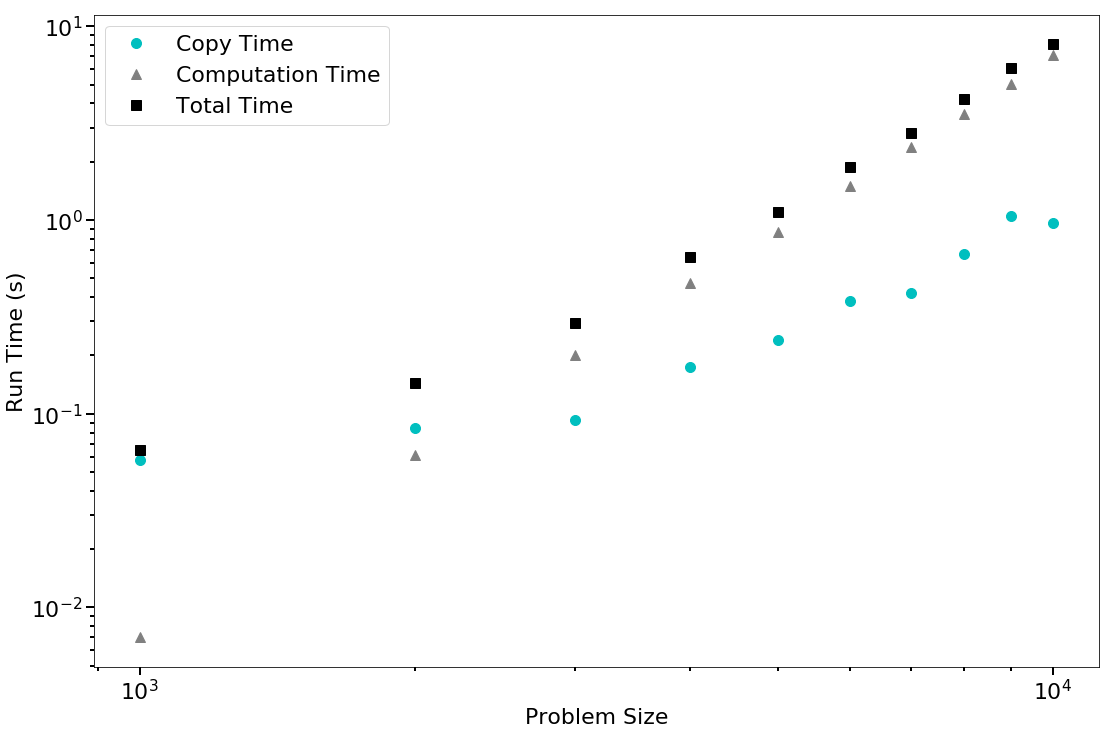

In [6]:
plt.loglog(N, copy, linestyle='none', marker='o', markersize=10, color='c', label='Copy Time')
plt.loglog(N, comp, linestyle='none', marker='^', markersize=10, color='grey', label='Computation Time')
plt.loglog(N, copy + comp, linestyle='none', marker='s', markersize=10, color='k', label='Total Time')

plt.xlabel("Problem Size")
plt.ylabel("Run Time (s)")
plt.legend()

plt.show()

In [7]:
result = linregress(np.log10(N), np.log10(comp))
comp_slope = result.slope
comp_inter = result.intercept
print(comp_slope, comp_inter)

2.97695482831 -11.0632820236


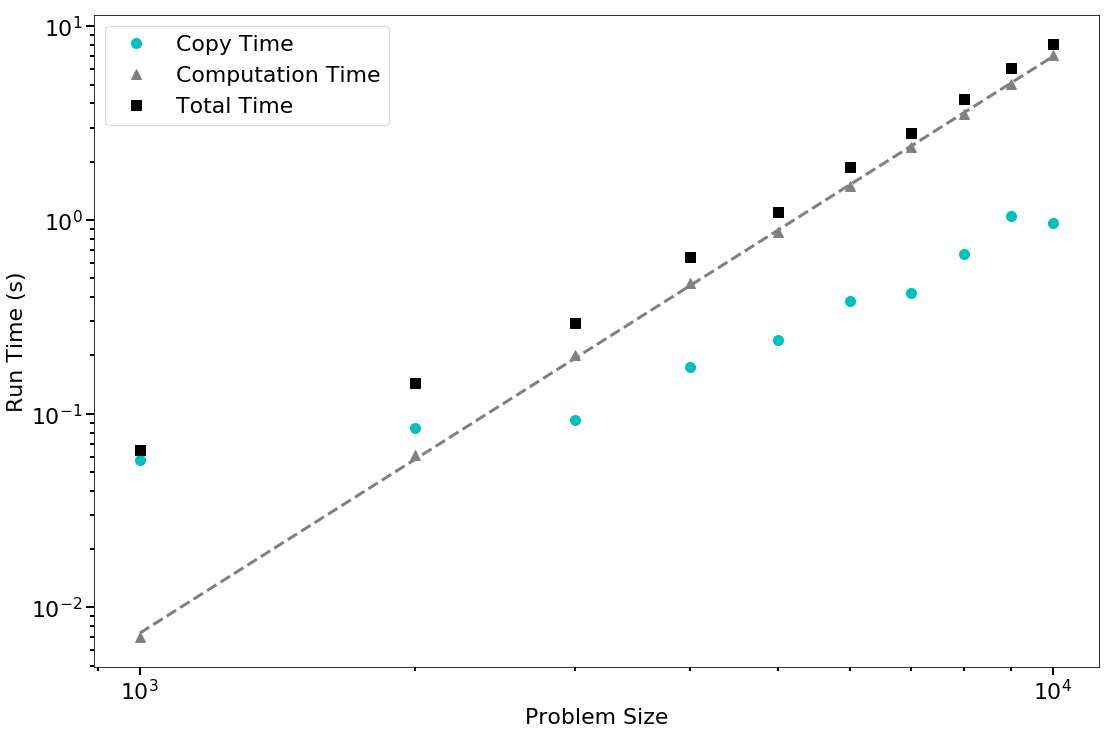

In [8]:
x_line = np.linspace(1000, 10000, 1000)
y_line = np.power(10, comp_slope * np.log10(x_line) + comp_inter)

plt.loglog(N, copy, linestyle='none', marker='o', markersize=10, color='c', label='Copy Time')
plt.loglog(N, comp, linestyle='none', marker='^', markersize=10, color='grey', label='Computation Time')
plt.loglog(N, copy + comp, linestyle='none', marker='s', markersize=10, color='k', label='Total Time')

plt.loglog(x_line, y_line, linestyle='--', color='grey', linewidth=3)

plt.xlabel("Problem Size")
plt.ylabel("Run Time (s)")
plt.legend()

plt.show()

In [9]:
data_file = 'mat_mul_threads_2_swap.out'

with open(data_file, 'r') as in_file:
    lines = in_file.readlines()
    thread_xs, thread_ys = [], []
    copy, comp = [], []
    for line in lines:
        if 'Threads:' in line:
            thread_data = line.strip().split()
            thread_ys.append(thread_data[-1])
            thread_xs.append(thread_data[-3])
        if 'GPU_copy' in line:
            copy.append(line.strip().split()[-2])
        if 'GPU:' in line:
            comp.append(line.strip().split()[-2])
            
    convert = lambda x : np.array(x).astype(float)
    thread_xs_1 = convert(thread_xs)
    thread_ys_1 = convert(thread_ys)
    copy_1 = convert(copy)
    comp_1 = convert(comp)

In [10]:
# X, Y = np.meshgrid(thread_xs, thread_ys)
# Z = np.ones((len(thread_xs), len(thread_ys))) * -10
# for i in range(len(thread_xs)):
#     Z[i, i] = np.log(comp[i])

# plt.pcolor(X, Y, Z, cmap='gray')
# plt.xlabel(r"$T_x$")
# plt.ylabel(r"$T_y$")
# plt.colorbar()
# plt.show()

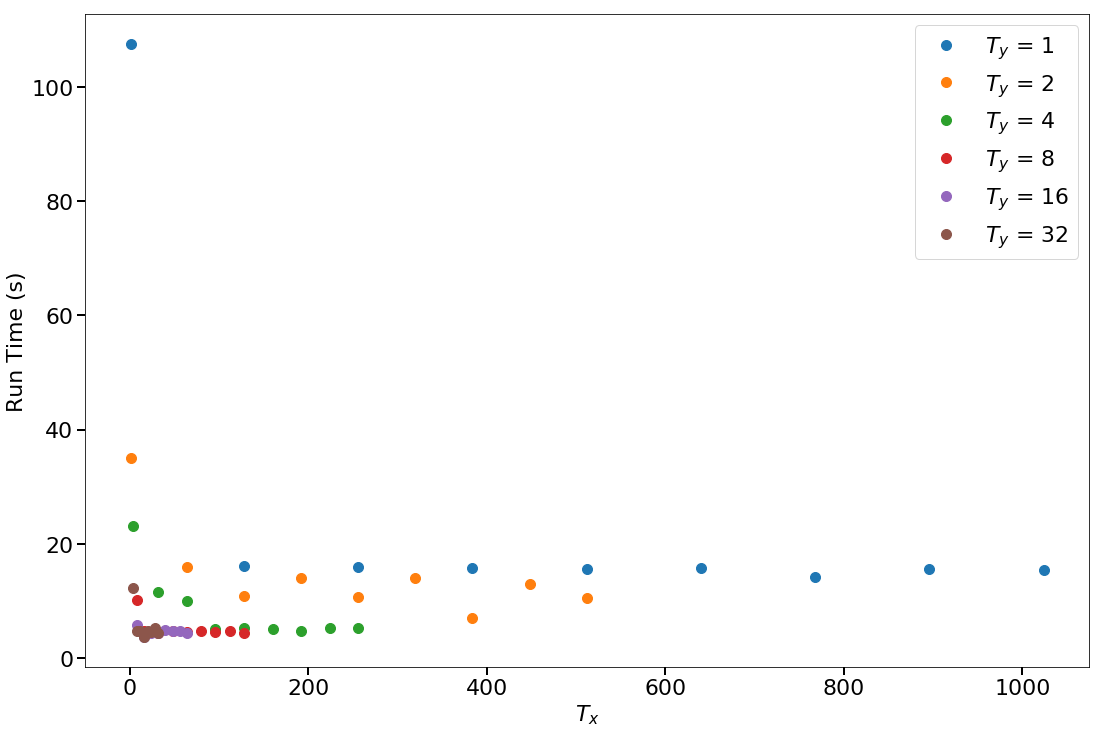

In [11]:
val = 1
plt.plot(thread_xs_1[np.where(thread_ys_1 == val)], comp_1[np.where(thread_ys_1 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_y$ = %s" % val)
val = 2
plt.plot(thread_xs_1[np.where(thread_ys_1 == val)], comp_1[np.where(thread_ys_1 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_y$ = %s" % val)
val = 4
plt.plot(thread_xs_1[np.where(thread_ys_1 == val)], comp_1[np.where(thread_ys_1 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_y$ = %s" % val)
val = 8
plt.plot(thread_xs_1[np.where(thread_ys_1 == val)], comp_1[np.where(thread_ys_1 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_y$ = %s" % val)
val = 16
plt.plot(thread_xs_1[np.where(thread_ys_1 == val)], comp_1[np.where(thread_ys_1 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_y$ = %s" % val)
val = 32
plt.plot(thread_xs_1[np.where(thread_ys_1 == val)], comp_1[np.where(thread_ys_1 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_y$ = %s" % val)

plt.xlabel(r"$T_x$")
plt.ylabel("Run Time (s)")
plt.legend()
plt.show()

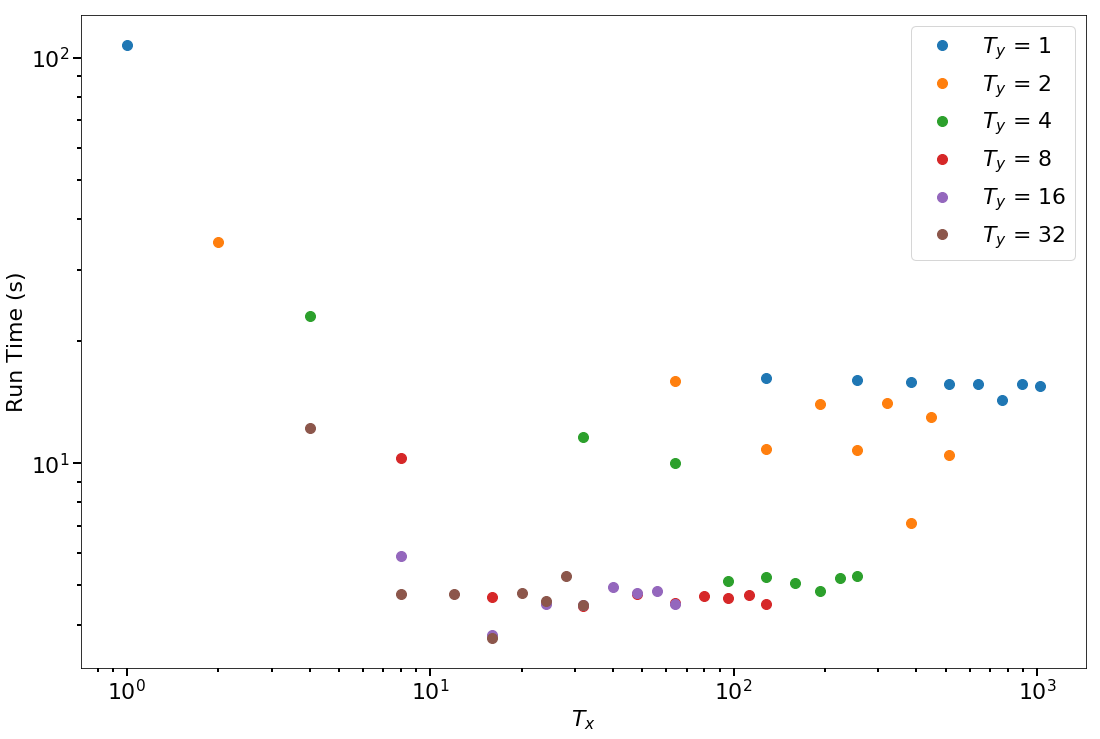

In [12]:
val = 1
plt.loglog(thread_xs_1[np.where(thread_ys_1 == val)], comp_1[np.where(thread_ys_1 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_y$ = %s" % val)
val = 2
plt.loglog(thread_xs_1[np.where(thread_ys_1 == val)], comp_1[np.where(thread_ys_1 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_y$ = %s" % val)
val = 4
plt.loglog(thread_xs_1[np.where(thread_ys_1 == val)], comp_1[np.where(thread_ys_1 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_y$ = %s" % val)
val = 8
plt.loglog(thread_xs_1[np.where(thread_ys_1 == val)], comp_1[np.where(thread_ys_1 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_y$ = %s" % val)
val = 16
plt.loglog(thread_xs_1[np.where(thread_ys_1 == val)], comp_1[np.where(thread_ys_1 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_y$ = %s" % val)
val = 32
plt.loglog(thread_xs_1[np.where(thread_ys_1 == val)], comp_1[np.where(thread_ys_1 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_y$ = %s" % val)

plt.xlabel(r"$T_x$")
plt.ylabel("Run Time (s)")
plt.legend()
plt.show()

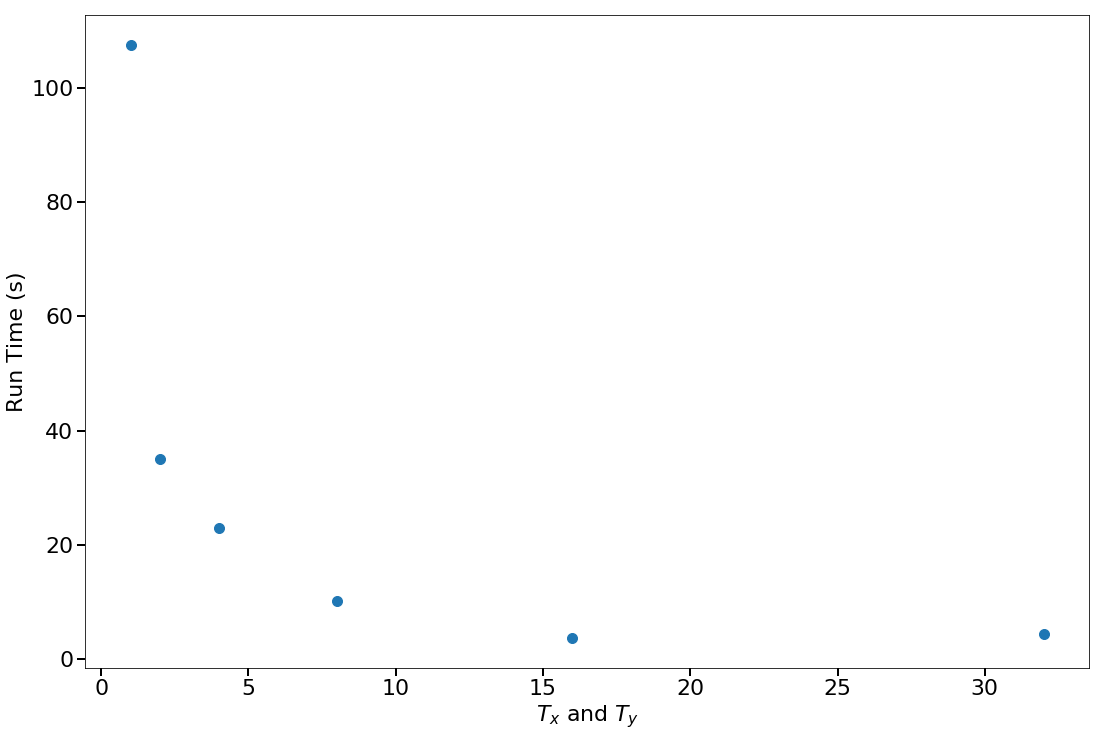

In [13]:
val = thread_xs_1
plt.plot(thread_xs_1[np.where(thread_ys_1 == val)], comp_1[np.where(thread_ys_1 == val)], linestyle='none', marker='o', markersize=10, label='Thread Y = Thread X')

plt.xlabel(r"$T_x$ and $T_y$")
plt.ylabel("Run Time (s)")
plt.show()

In [14]:
data_file = 'mat_mul_threads_2_again.out'

with open(data_file, 'r') as in_file:
    lines = in_file.readlines()
    thread_xs, thread_ys = [], []
    copy, comp = [], []
    for line in lines:
        if 'Threads:' in line:
            thread_data = line.strip().split()
            thread_ys.append(thread_data[-1])
            thread_xs.append(thread_data[-3])
        if 'GPU_copy' in line:
            copy.append(line.strip().split()[-2])
        if 'GPU:' in line:
            comp.append(line.strip().split()[-2])
            
    convert = lambda x : np.array(x).astype(float)
    thread_xs_2 = convert(thread_xs)
    thread_ys_2 = convert(thread_ys)
    copy_2 = convert(copy)
    comp_2 = convert(comp)

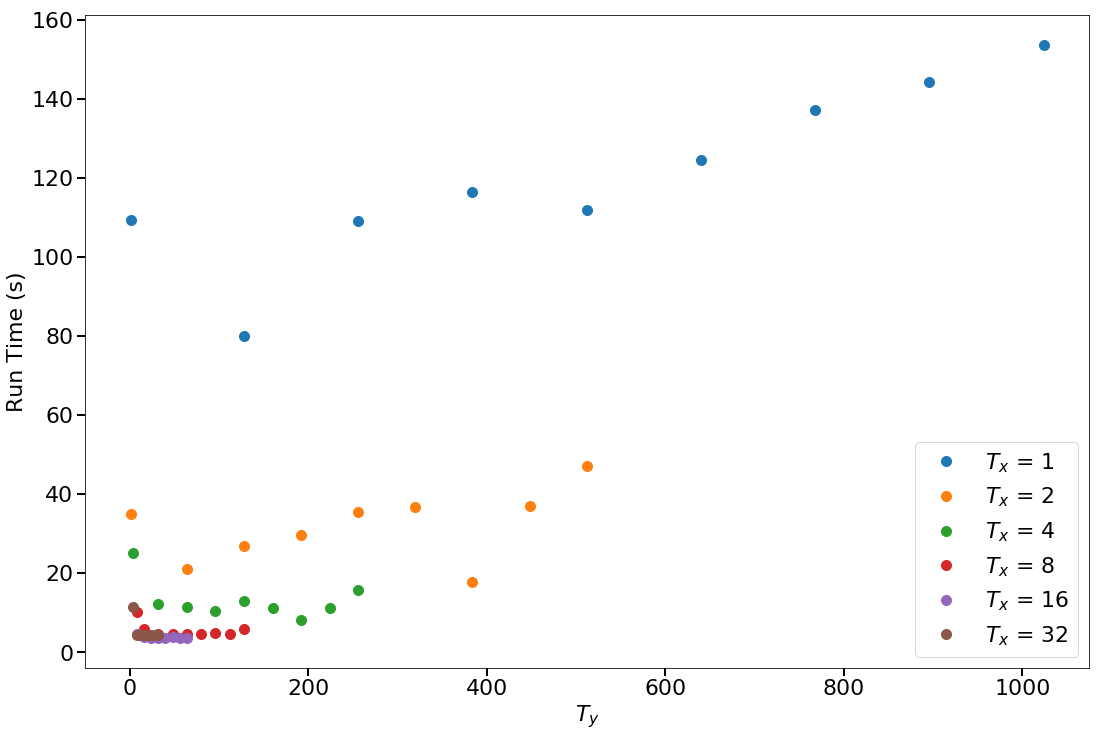

In [15]:
val = 1
plt.plot(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)
val = 2
plt.plot(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)
val = 4
plt.plot(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)
val = 8
plt.plot(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)
val = 16
plt.plot(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)
val = 32
plt.plot(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)

plt.xlabel(r"$T_y$")
plt.ylabel("Run Time (s)")
plt.legend()
plt.show()

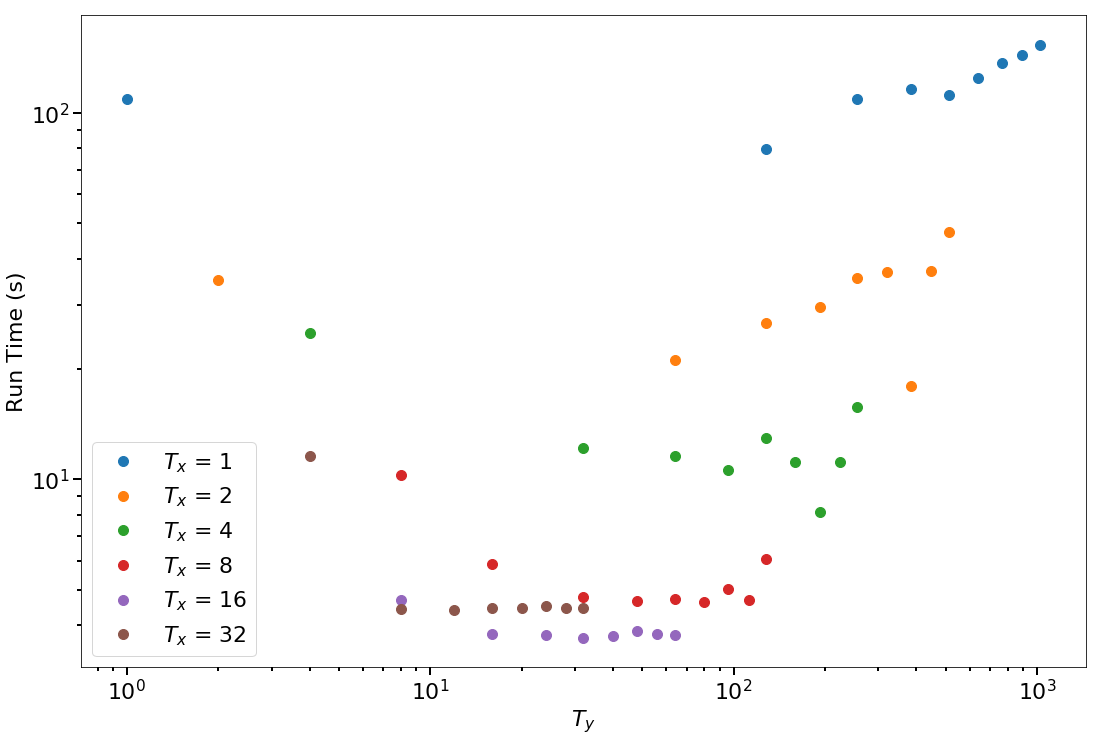

In [16]:
val = 1
plt.loglog(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)
val = 2
plt.loglog(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)
val = 4
plt.loglog(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)
val = 8
plt.loglog(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)
val = 16
plt.loglog(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)
val = 32
plt.loglog(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)

plt.xlabel(r"$T_y$")
plt.ylabel("Run Time (s)")
plt.legend()
plt.show()

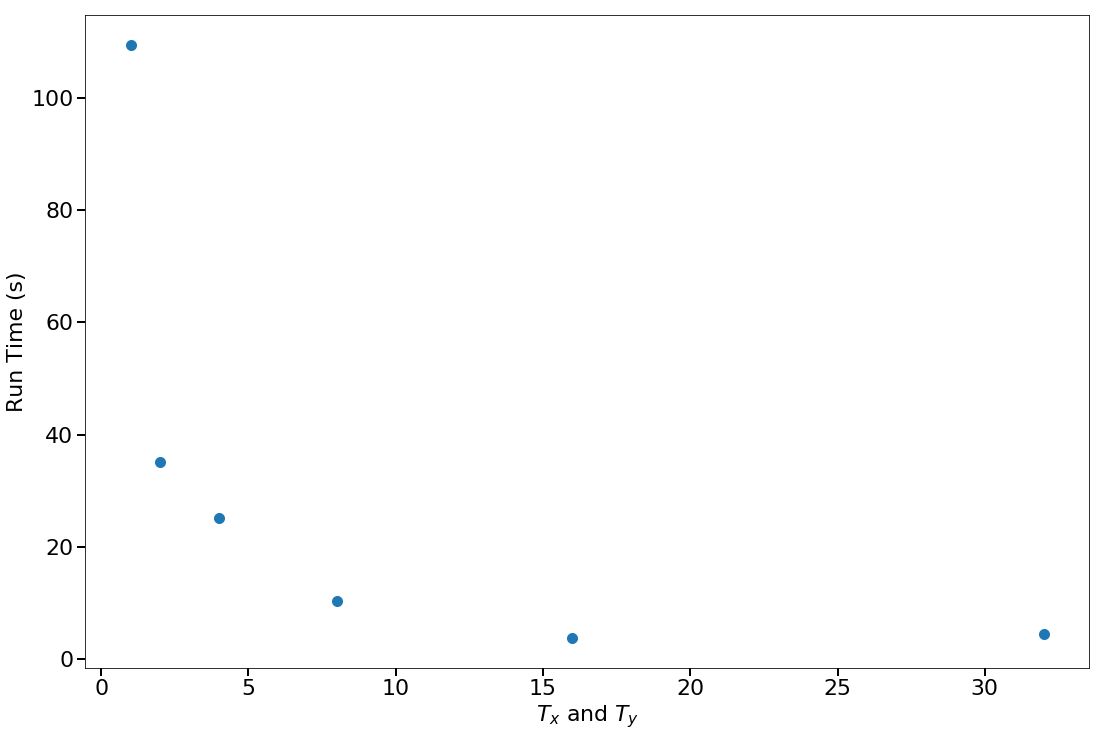

In [17]:
val = thread_xs_2
plt.plot(thread_xs_2[np.where(thread_ys_2 == val)], comp_2[np.where(thread_ys_2 == val)], linestyle='none', marker='o', markersize=10)

plt.xlabel(r"$T_x$ and $T_y$")
plt.ylabel("Run Time (s)")
plt.show()

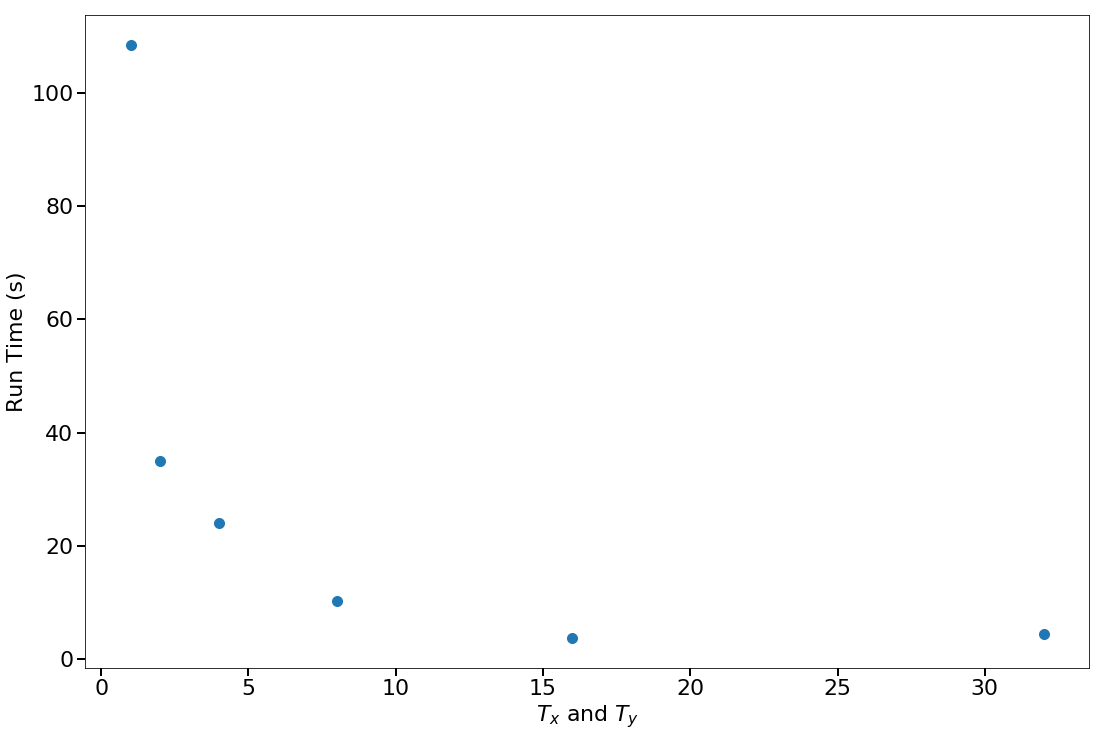

In [18]:
val = thread_xs_2
plt.plot(thread_xs_2[np.where(thread_ys_2 == val)], 0.5 * (comp_1[np.where(thread_ys_1 == thread_xs_1)] + comp_2[np.where(thread_ys_2 == val)]), linestyle='none', marker='o', markersize=10)

plt.xlabel(r"$T_x$ and $T_y$")
plt.ylabel("Run Time (s)")
plt.show()

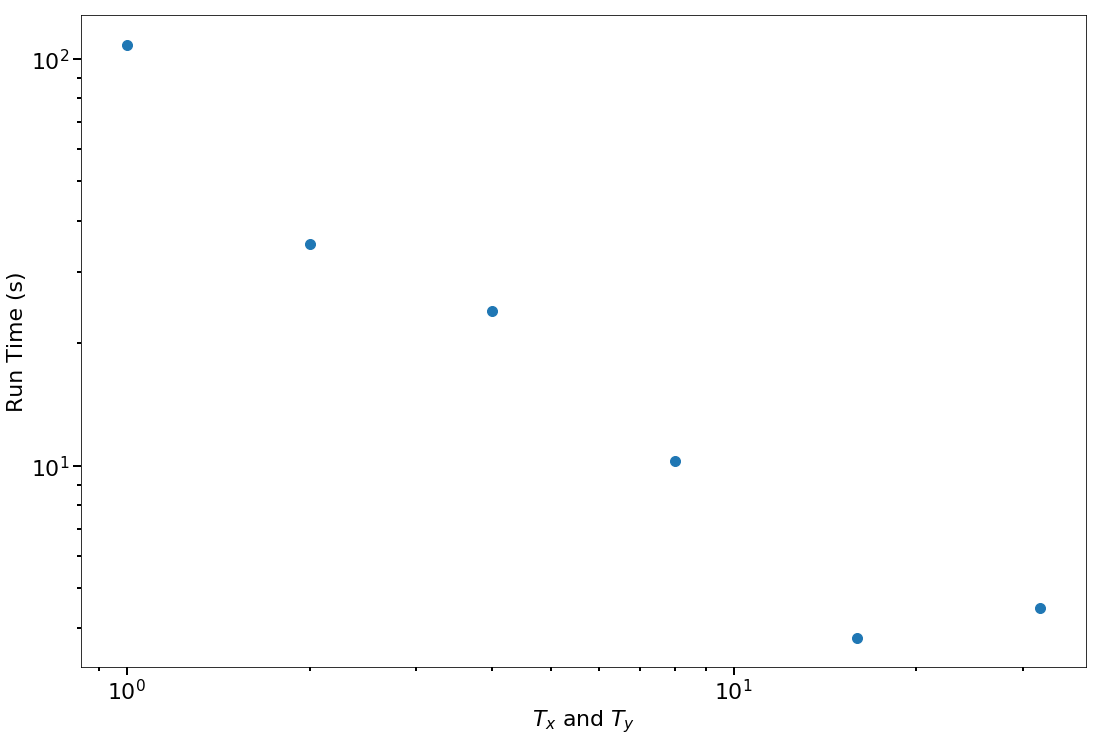

In [19]:
val = thread_xs_2
plt.loglog(thread_xs_2[np.where(thread_ys_2 == val)], 0.5 * (comp_1[np.where(thread_ys_1 == thread_xs_1)] + comp_2[np.where(thread_ys_2 == val)]), linestyle='none', marker='o', markersize=10)

plt.xlabel(r"$T_x$ and $T_y$")
plt.ylabel("Run Time (s)")
plt.show()

In [27]:
thread_xs_1[np.where(comp_1 == np.max(comp_1))], thread_ys_1[np.where(comp_1 == np.max(comp_1))]

(array([ 1.]), array([ 1.]))

In [26]:
thread_xs_2[np.where(comp_2 == np.max(comp_2))], thread_ys_2[np.where(comp_2 == np.max(comp_2))]

(array([ 1.]), array([ 1024.]))

In [28]:
np.max(comp_1), np.max(comp_2)

(107.48, 153.59999999999999)

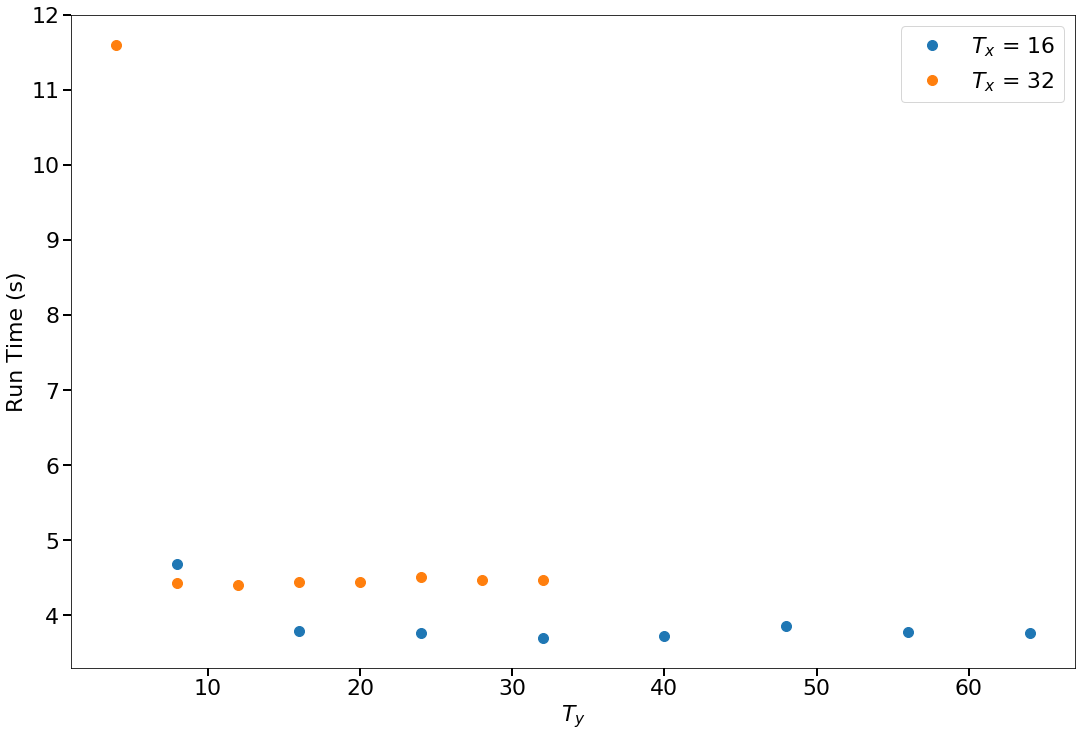

In [29]:
val = 16
plt.plot(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)
val = 32
plt.plot(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)

plt.xlabel(r"$T_y$")
plt.ylabel("Run Time (s)")
plt.legend()
plt.show()

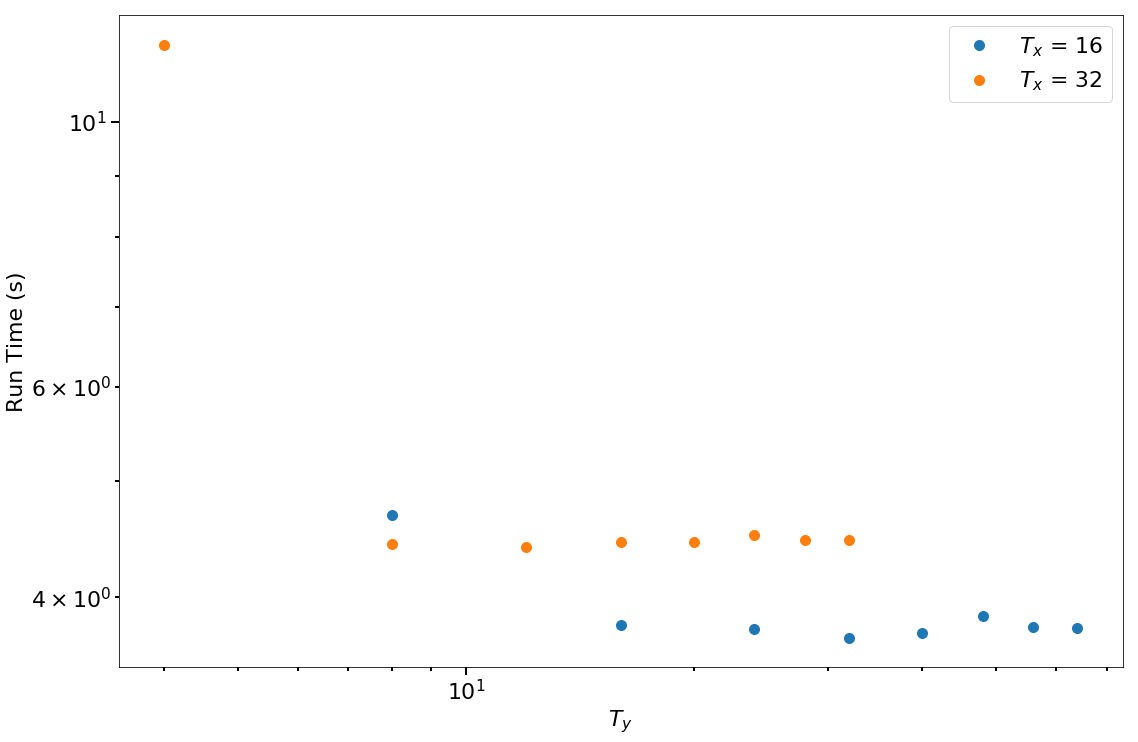

In [30]:
val = 16
plt.loglog(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)
val = 32
plt.loglog(thread_ys_2[np.where(thread_xs_2 == val)], comp_2[np.where(thread_xs_2 == val)], linestyle='none', marker='o', markersize=10, label=r"$T_x$ = %s" % val)

plt.xlabel(r"$T_y$")
plt.ylabel("Run Time (s)")
plt.legend()
plt.show()